In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dbt-district-wise.csv to dbt-district-wise (1).csv


In [ ]:
df = pd.read_csv('dbt-district-wise.csv')
df.head()


,id,fy,state_name,state_code,district_name,district_code,total_dbt_transfer,no_of_dbt_transactions
0,0,2019-2020,Jammu And Kashmir,1,Anantnag,1,203800000.0,720115.0
1,1,2019-2020,Jammu And Kashmir,1,Budgam,2,54600000.0,204443.0
2,2,2019-2020,Jammu And Kashmir,1,Baramulla,3,246800000.0,911993.0
3,3,2019-2020,Jammu And Kashmir,1,Doda,4,53800000.0,243799.0
4,4,2019-2020,Jammu And Kashmir,1,Jammu,5,442000000.0,2277901.0


In [ ]:

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(df.columns.tolist())


['id', 'fy', 'state_name', 'state_code', 'district_name', 'district_code', 'total_dbt_transfer', 'no_of_dbt_transactions']


In [ ]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate rows: 0


In [ ]:
print("Missing values:\n", df.isnull().sum())


df = df.dropna(subset=['total_dbt_transfer', 'no_of_dbt_transactions'])


Missing values:
 id                          0
fy                          0
state_name                  0
state_code                  0
district_name               0
district_code               0
total_dbt_transfer        121
no_of_dbt_transactions    121
dtype: int64


In [ ]:
df['fy'] = df['fy'].astype(str)
df['total_dbt_transfer'] = pd.to_numeric(df['total_dbt_transfer'], errors='coerce')
df['no_of_dbt_transactions'] = pd.to_numeric(df['no_of_dbt_transactions'], errors='coerce')



In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 3704 entries, 0 to 3824
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3704 non-null   int64  
 1   fy                      3704 non-null   object 
 2   state_name              3704 non-null   object 
 3   state_code              3704 non-null   int64  
 4   district_name           3704 non-null   object 
 5   district_code           3704 non-null   int64  
 6   total_dbt_transfer      3704 non-null   float64
 7   no_of_dbt_transactions  3704 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 260.4+ KB


,id,state_code,district_code,total_dbt_transfer,no_of_dbt_transactions
count,3704.000000,3704.000000,3704.000000,3.704000e+03,3.704000e+03
mean,1935.538877,18.043197,374.376890,5.335127e+09,5.857480e+06
std,1106.159907,9.837885,215.727734,6.450278e+09,8.395287e+06
min,0.000000,1.000000,1.000000,-3.320000e+07,-8.270500e+04
25%,980.750000,9.000000,188.000000,4.880732e+08,7.759725e+05
50%,1945.500000,19.000000,373.000000,2.474470e+09,2.818584e+06
75%,2898.250000,24.000000,561.000000,8.400165e+09,8.235573e+06
max,3824.000000,38.000000,783.000000,3.955478e+10,9.716942e+07


Total dbt transfer by state

✅ Text columns cleaned successfully!

🔠 Top 10 most common words in district names:
west: 90
east: 70
south: 60
hills: 55
nagar: 50
north: 45
district: 25
siang: 25
garo: 25
khasi: 20

☁️ Generating Word Cloud...


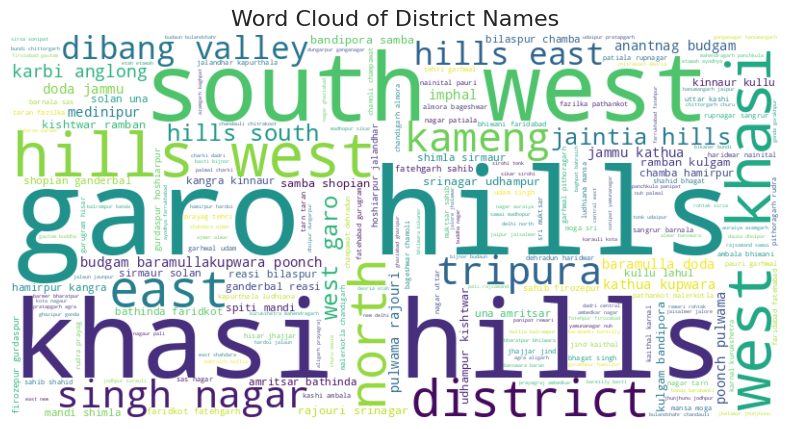


🔍 Example: Find districts similar to 'Aurangabad' (by name pattern)

📍 Districts most similar to 'Aurangabad':
     district_name   state_name
2105    Aurangabad  Maharashtra
1741    Aurangabad        Bihar
3271    Aurangabad        Bihar
575     Aurangabad  Maharashtra
2506    Aurangabad        Bihar

🤖 Performing K-Means Clustering on district names...
✅ Clustering complete! Sample output:
  district_name         state_name  district_text_cluster
0      Anantnag  Jammu And Kashmir                      0
1        Budgam  Jammu And Kashmir                      0
2     Baramulla  Jammu And Kashmir                      0
3          Doda  Jammu And Kashmir                      0
4         Jammu  Jammu And Kashmir                      0
5        Kathua  Jammu And Kashmir                      0
6       Kupwara  Jammu And Kashmir                      0
7        Poonch  Jammu And Kashmir                      0
8       Pulwama  Jammu And Kashmir                      0
9       Rajouri  Jammu A

In [ ]:
# ===============================
# 📊 NLP Analysis on DBT Dataset
# ===============================

# Import required libraries
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# -------------------------------
# Step 1: Load dataset
# -------------------------------
df = pd.read_csv("dbt-district-wise-cleaned.csv")

# -------------------------------
# Step 2: Clean text data
# -------------------------------
def clean_text(text):
    text = str(text).lower().strip()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['state_clean'] = df['state_name'].apply(clean_text)
df['district_clean'] = df['district_name'].apply(clean_text)

print("✅ Text columns cleaned successfully!\n")

# -------------------------------
# Step 3: Most common words in district names
# -------------------------------
all_words = ' '.join(df['district_clean']).split()
word_freq = Counter(all_words)
print("🔠 Top 10 most common words in district names:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

# -------------------------------
# Step 4: Generate Word Cloud
# -------------------------------
print("\n☁️ Generating Word Cloud...")
text = ' '.join(df['district_clean'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of District Names", fontsize=16)
plt.show()

# -------------------------------
# Step 5: District Name Similarity
# -------------------------------
print("\n🔍 Example: Find districts similar to 'Aurangabad' (by name pattern)")
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['district_clean'])

cosine_sim = cosine_similarity(X)

# Handle if the district exists
try:
    target = "Aurangabad"
    idx = df[df['district_clean'] == target.lower()].index[0]
    similar_indices = cosine_sim[idx].argsort()[-6:-1][::-1]
    print(f"\n📍 Districts most similar to '{target}':")
    print(df.iloc[similar_indices][['district_name', 'state_name']])
except IndexError:
    print("District 'Aurangabad' not found. Try another district name.")

# -------------------------------
# Step 6: Cluster Districts by Text Similarity
# -------------------------------
print("\n🤖 Performing K-Means Clustering on district names...")
kmeans = KMeans(n_clusters=5, random_state=42)
df['district_text_cluster'] = kmeans.fit_predict(X)

print("✅ Clustering complete! Sample output:")
print(df[['district_name', 'state_name', 'district_text_cluster']].head(10))

# -------------------------------
# Step 7: Analyze name patterns
# -------------------------------
print("\n🔡 Checking naming patterns (districts ending with common suffixes)...")
patterns = ['pur', 'garh', 'nagar']
for p in patterns:
    subset = df[df['district_clean'].str.endswith(p)]
    print(f"Districts ending with '{p}': {len(subset)}")

# -------------------------------
# Step 8: Combine NLP with numeric analysis
# -------------------------------
df['endswith_nagar'] = df['district_clean'].str.endswith('nagar')
mean_transfer = df.groupby('endswith_nagar')['total_dbt_transfer'].mean()
print("\n💰 Average DBT Transfer for districts ending with 'nagar':")
print(mean_transfer)

print("\n✅ NLP analysis complete!")


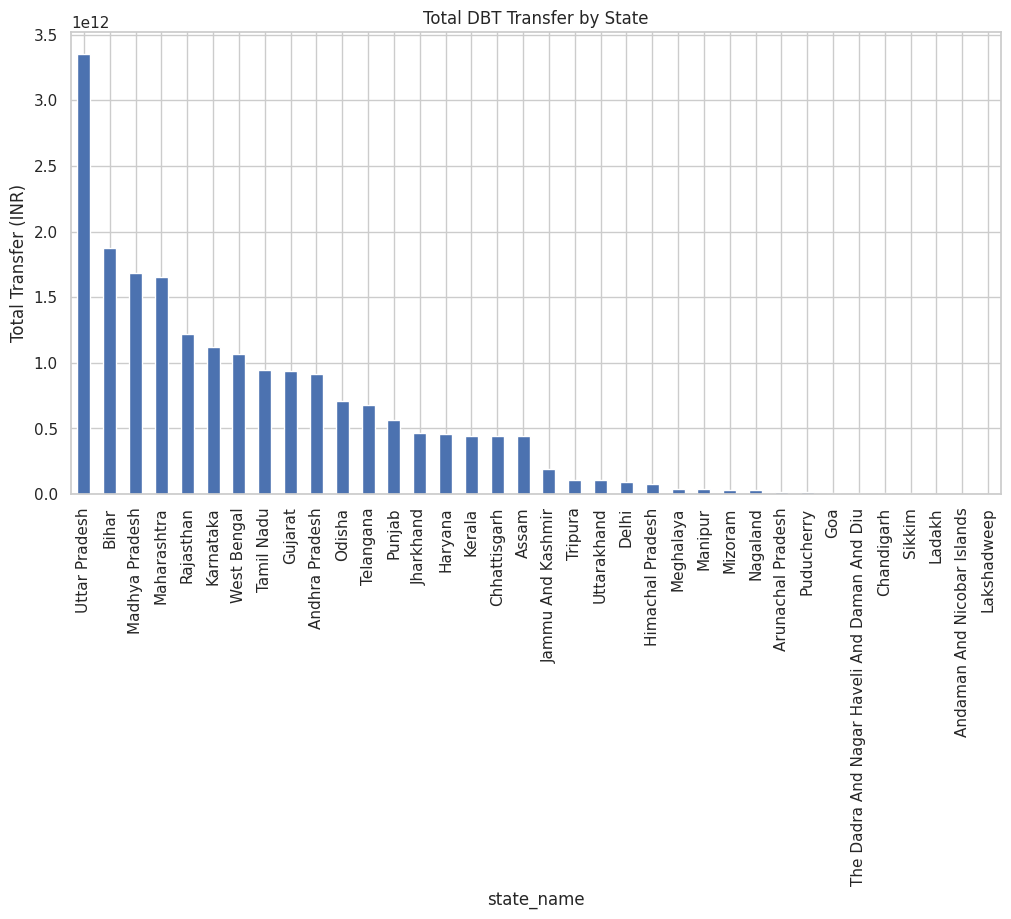

In [ ]:
state_transfer = df.groupby('state_name')['total_dbt_transfer'].sum().sort_values(ascending=False)

state_transfer.plot(kind='bar')
plt.title('Total DBT Transfer by State')
plt.ylabel('Total Transfer (INR)')
plt.xticks(rotation=90)
plt.show()


Total DBT transaction by State

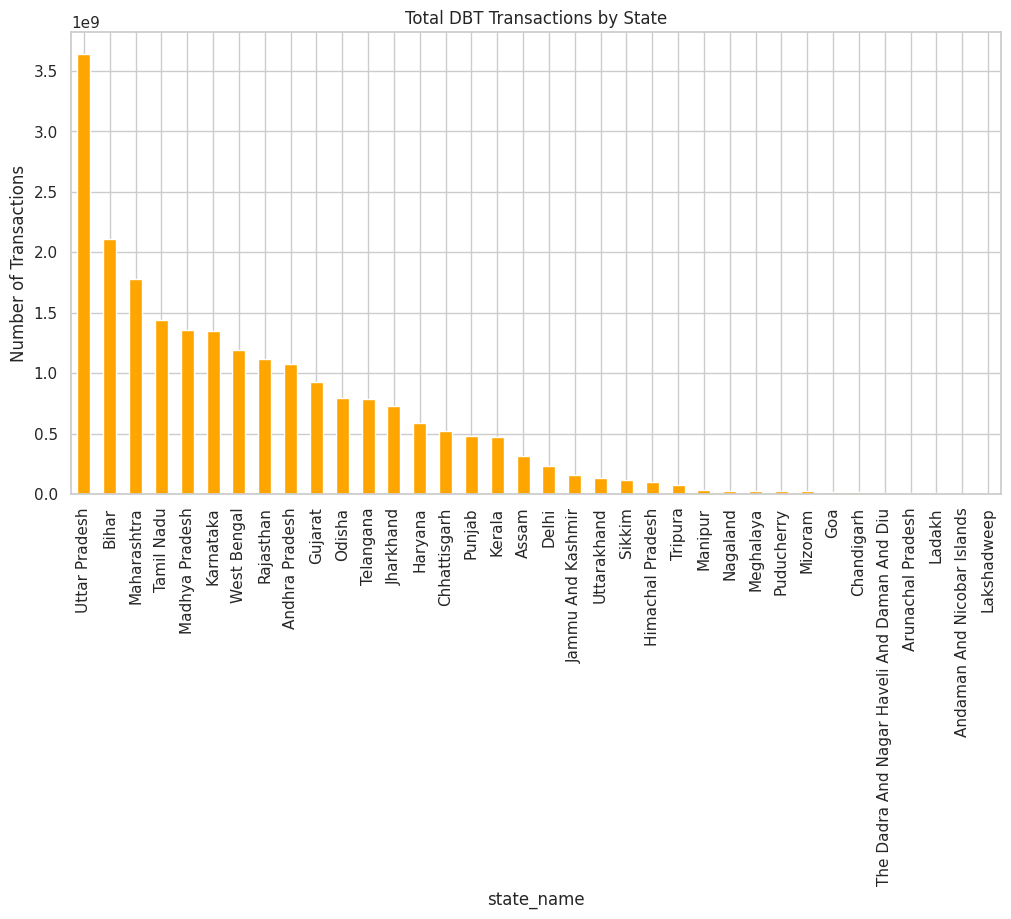

In [ ]:
state_transactions = df.groupby('state_name')['no_of_dbt_transactions'].sum().sort_values(ascending=False)

state_transactions.plot(kind='bar', color='orange')
plt.title('Total DBT Transactions by State')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


Correlation between Tranfers and Transaction

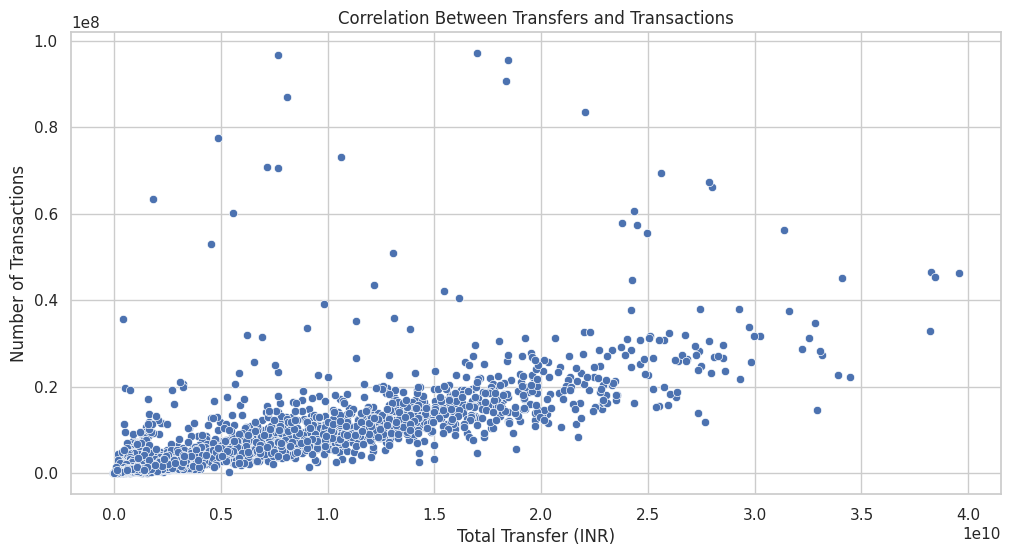

,total_dbt_transfer,no_of_dbt_transactions
total_dbt_transfer,1.000000,0.761008
no_of_dbt_transactions,0.761008,1.000000


In [ ]:
sns.scatterplot(data=df, x='total_dbt_transfer', y='no_of_dbt_transactions')
plt.title('Correlation Between Transfers and Transactions')
plt.xlabel('Total Transfer (INR)')
plt.ylabel('Number of Transactions')
plt.show()

# Correlation value
df[['total_dbt_transfer', 'no_of_dbt_transactions']].corr()


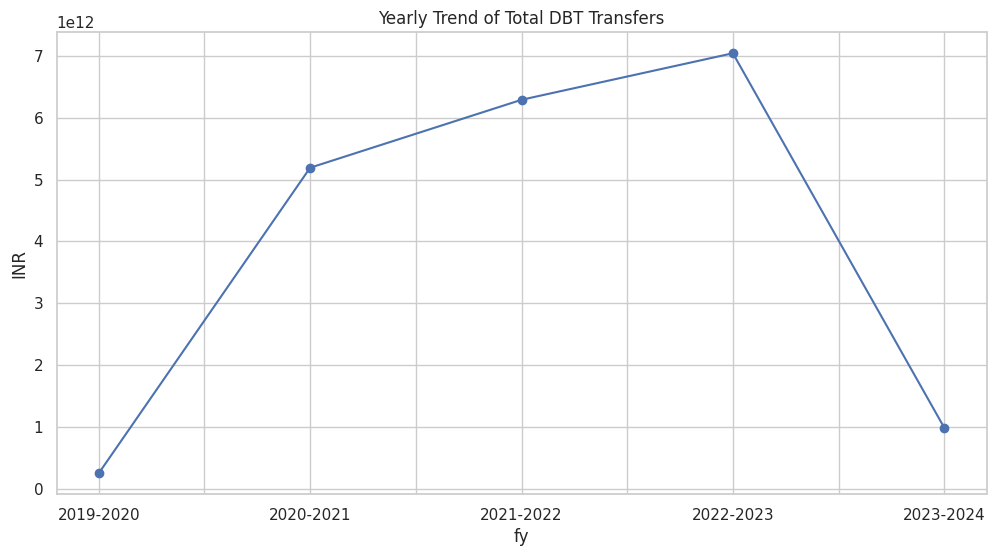

In [ ]:
df.groupby('fy')['total_dbt_transfer'].sum().plot(marker='o')
plt.title('Yearly Trend of Total DBT Transfers')
plt.xlabel('fy')
plt.ylabel('INR')
plt.grid(True)
plt.show()


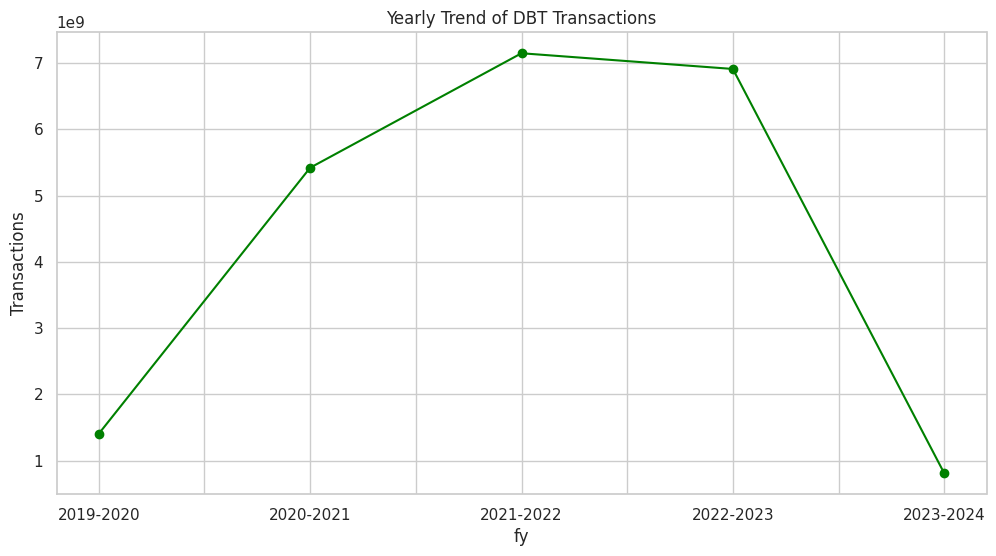

In [ ]:
df.groupby('fy')['no_of_dbt_transactions'].sum().plot(marker='o', color='green')
plt.title('Yearly Trend of DBT Transactions')
plt.xlabel('fy')
plt.ylabel('Transactions')
plt.grid(True)
plt.show()


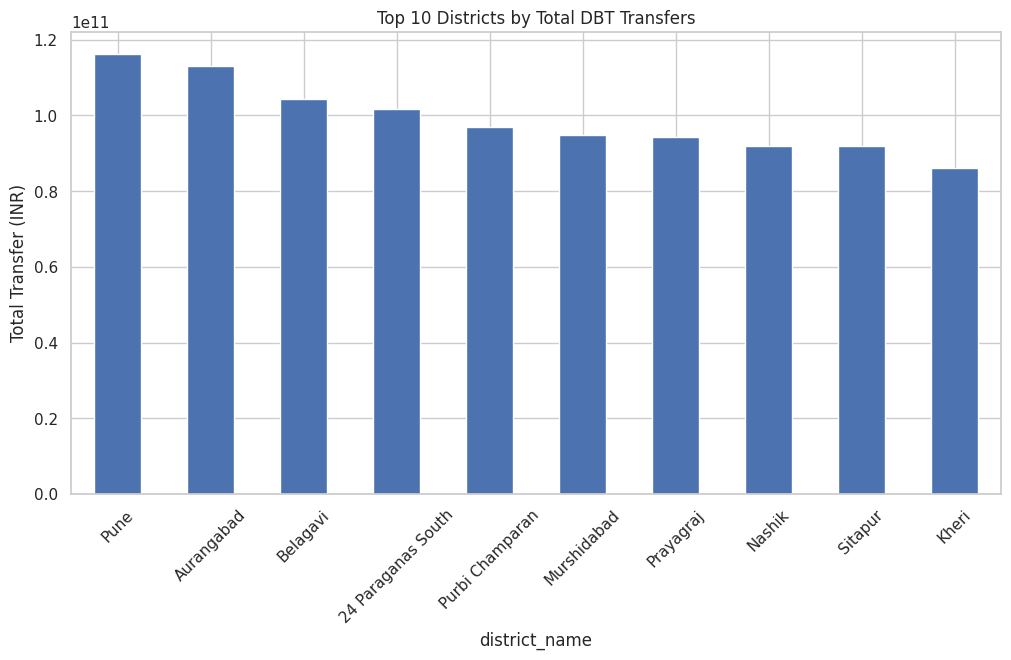

In [ ]:
df.groupby('district_name')['total_dbt_transfer'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Districts by Total DBT Transfers')
plt.ylabel('Total Transfer (INR)')
plt.xticks(rotation=45)
plt.show()


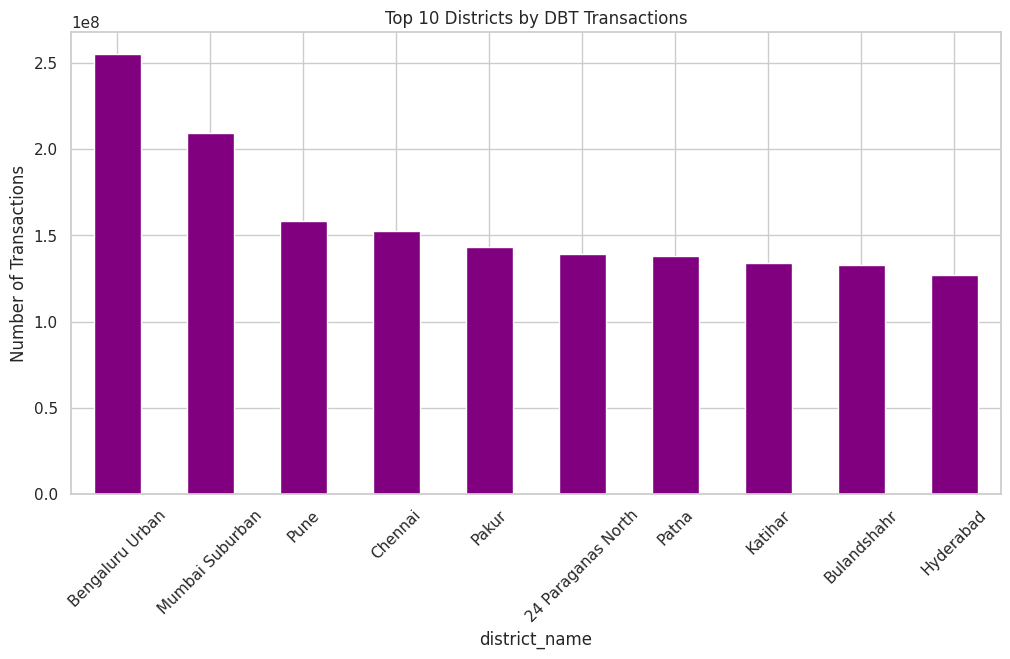

In [ ]:
df.groupby('district_name')['no_of_dbt_transactions'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Districts by DBT Transactions')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


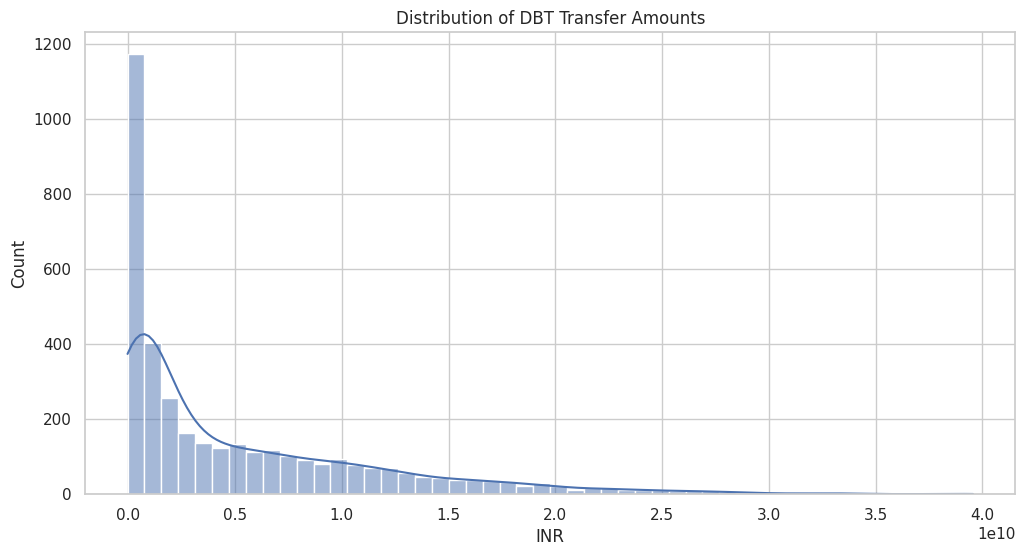

In [ ]:
sns.histplot(df['total_dbt_transfer'], bins=50, kde=True)
plt.title('Distribution of DBT Transfer Amounts')
plt.xlabel('INR')
plt.show()


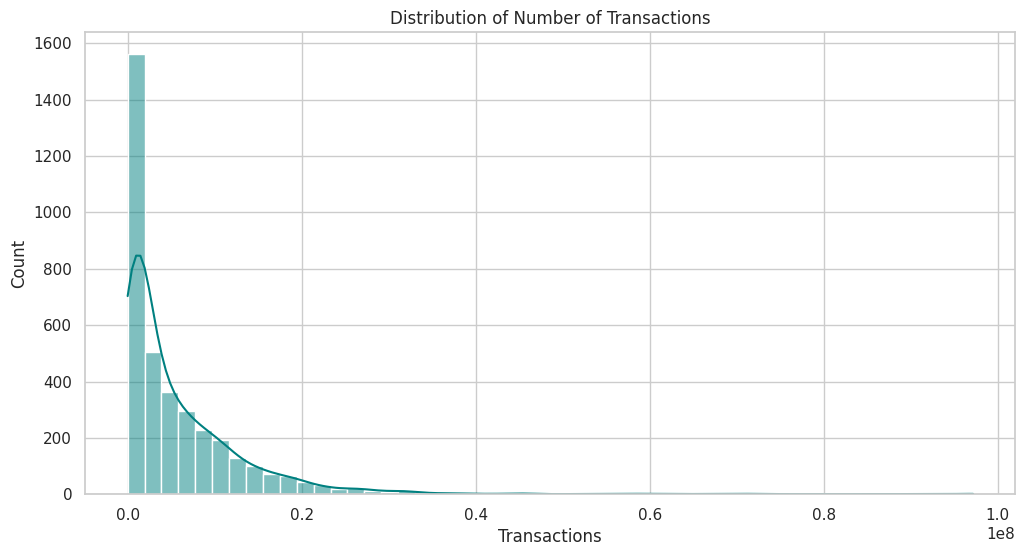

In [ ]:
sns.histplot(df['no_of_dbt_transactions'], bins=50, kde=True, color='teal')
plt.title('Distribution of Number of Transactions')
plt.xlabel('Transactions')
plt.show()


States with the Highest Average Transfer Value
Lakshadweep stands out significantly, with an average transfer value of over $3,700$, which is more than double the average of any other top state. This suggests transactions there are of a much higher value on average.

--- Data Loaded Successfully for Plot 1 ---


/tmp/ipython-input-3060772506.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Plot 1 saved as 'top_10_states_avg_transfer.png'


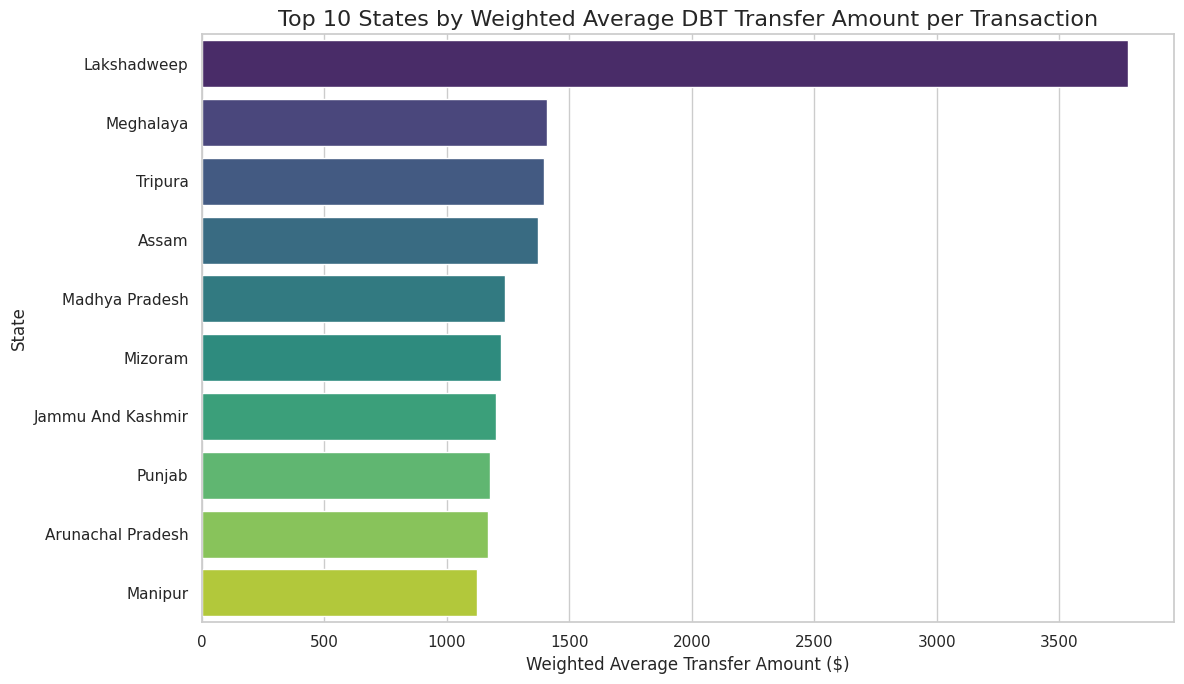

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_name = 'dbt-district-wise-cleaned (1).csv'
try:
    df = pd.read_csv(file_name)
    print("--- Data Loaded Successfully for Plot 1 ---")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure the file is uploaded to your Colab environment.")
    raise

# --- Plot 1 Logic ---

# Group by state, sum totals, then calculate weighted average
state_grouped = df.groupby('state_name').agg(
    total_transfer_sum=('total_dbt_transfer', 'sum'),
    total_transactions_sum=('no_of_dbt_transactions', 'sum')
).reset_index()

# Calculate weighted average transfer per transaction
state_grouped['weighted_avg_transfer'] = np.where(
    state_grouped['total_transactions_sum'] == 0,
    0,
    state_grouped['total_transfer_sum'] / state_grouped['total_transactions_sum']
)

# Sort by the weighted average and get top 10
top_10_states_avg_transfer = state_grouped.sort_values(
    by='weighted_avg_transfer', ascending=False
).head(10)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_10_states_avg_transfer,
    x='weighted_avg_transfer',
    y='state_name',
    palette='viridis'
)
plt.title('Top 10 States by Weighted Average DBT Transfer Amount per Transaction', fontsize=16)
plt.xlabel('Weighted Average Transfer Amount ($)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.savefig('top_10_states_avg_transfer.png')
print("Plot 1 saved as 'top_10_states_avg_transfer.png'")
plt.show() # Use plt.show() to display the plot in Colab

Top 10 States by Weighted Average DBT Transfer Amount per Transaction

2. Districts with the Highest Average Transfer Value
Drilling down to the district level, we see a similar pattern. The "Lakshadweep District" is at the top. Interestingly, several districts in Meghalaya (like West Khasi Hills and East Garo Hills) also appear in the top 10, indicating localized areas with high-value average transfers.

--- Data Loaded Successfully for Plot 2 ---


/tmp/ipython-input-3282773268.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Plot 2 saved as 'top_10_districts_avg_transfer.png'


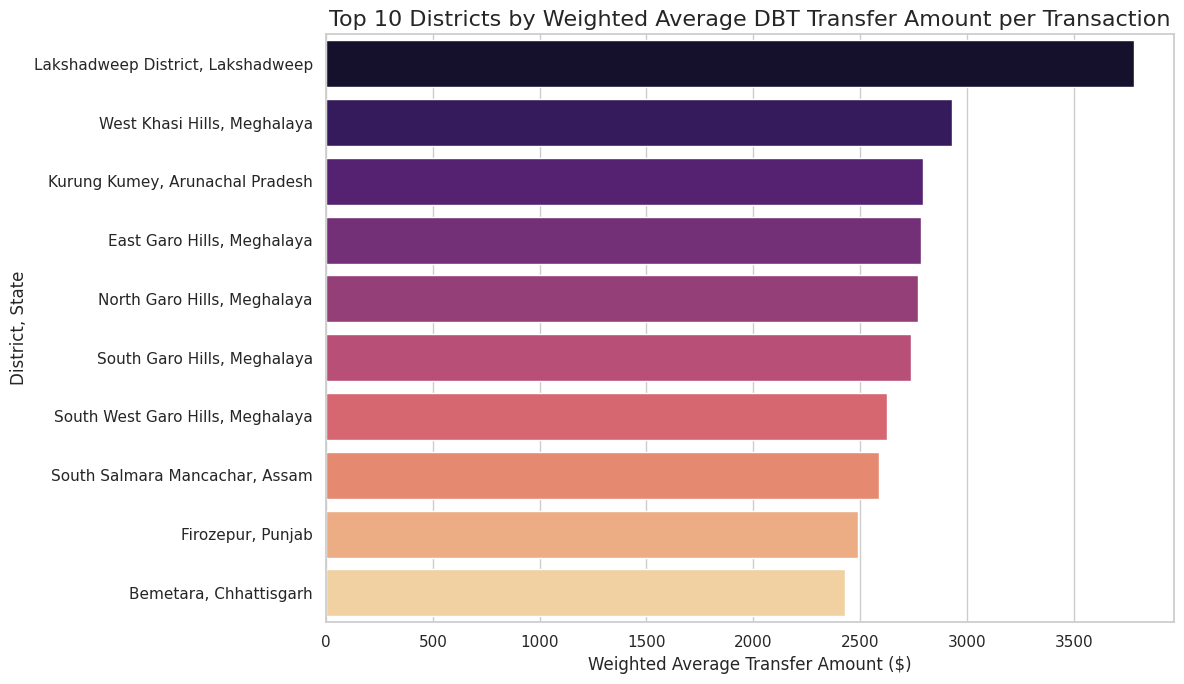

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_name = 'dbt-district-wise-cleaned (1).csv'
try:
    df = pd.read_csv(file_name)
    print("--- Data Loaded Successfully for Plot 2 ---")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure the file is uploaded to your Colab environment.")
    raise

# --- Plot 2 Logic ---

# Group by state and district, sum totals, then calculate weighted average
district_grouped = df.groupby(['state_name', 'district_name']).agg(
    total_transfer_sum=('total_dbt_transfer', 'sum'),
    total_transactions_sum=('no_of_dbt_transactions', 'sum')
).reset_index()

# Calculate weighted average transfer per transaction
district_grouped['weighted_avg_transfer'] = np.where(
    district_grouped['total_transactions_sum'] == 0,
    0,
    district_grouped['total_transfer_sum'] / district_grouped['total_transactions_sum']
)

# Sort by the weighted average and get top 10
top_10_districts_avg_transfer = district_grouped.sort_values(
    by='weighted_avg_transfer', ascending=False
).head(10)

# Create a combined 'District, State' column for plotting
top_10_districts_avg_transfer['district_state'] = top_10_districts_avg_transfer['district_name'] + ', ' + top_10_districts_avg_transfer['state_name']

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_10_districts_avg_transfer,
    x='weighted_avg_transfer',
    y='district_state',
    palette='magma'
)
plt.title('Top 10 Districts by Weighted Average DBT Transfer Amount per Transaction', fontsize=16)
plt.xlabel('Weighted Average Transfer Amount ($)', fontsize=12)
plt.ylabel('District, State', fontsize=12)
plt.tight_layout()
plt.savefig('top_10_districts_avg_transfer.png')
print("Plot 2 saved as 'top_10_districts_avg_transfer.png'")
plt.show() # Use plt.show() to display the plot in Colab

Yearly Growth Shows a Massive COVID-19 SpikeYour report noted the yearly trends. I analyzed the year-over-year (YoY) percentage growth of total transfers, which tells a dramatic story:2020-2021: Total DBT transfers exploded, growing by over $1280\%$ from the previous year. This massive spike is almost certainly related to the government's increased relief spending and economic support during the peak of the COVID-19 pandemic.2021-2023: The growth normalized but remained positive, with a $\approx21\%$ increase in 2021-2022 and an $\approx11\%$ increase in 2022-2023.2023-2024: The data shows a sharp drop of $\approx-86\%$. It's very important to note that this is likely because the dataset only contains partial data for the 2023-2024 financial year. This is not a confirmed crash in DBT, but rather a reflection of an incomplete data period.

--- Data Loaded Successfully for Plot 3 ---


/tmp/ipython-input-3230074052.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Plot 3 saved as 'yoy_dbt_transfer_growth.png'


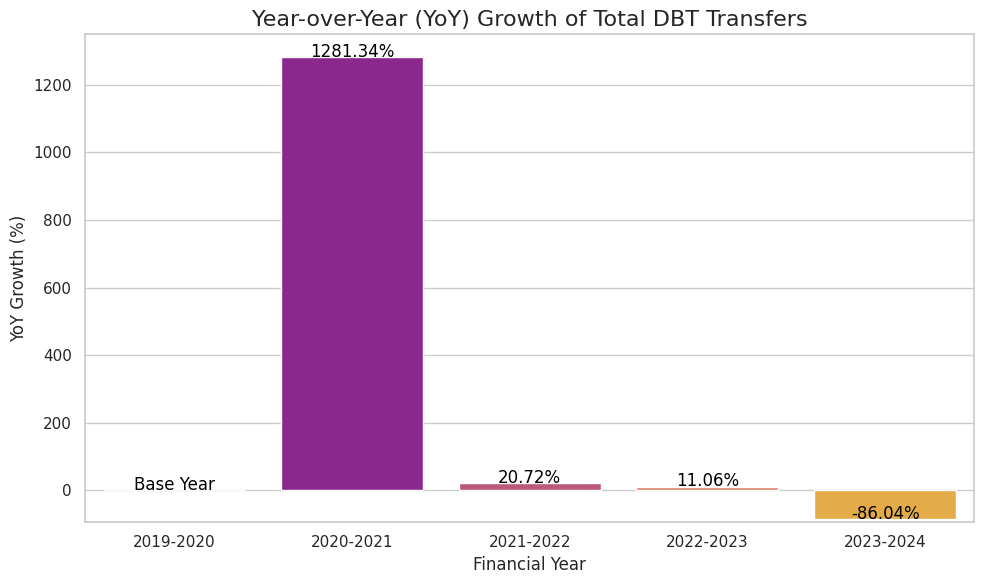

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_name = 'dbt-district-wise-cleaned (1).csv'
try:
    df = pd.read_csv(file_name)
    print("--- Data Loaded Successfully for Plot 3 ---")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure the file is uploaded to your Colab environment.")
    raise

# --- Plot 3 Logic ---

# Group by financial year and sum total transfers
yearly_data = df.groupby('fy').agg(
    total_transfer=('total_dbt_transfer', 'sum')
).reset_index()

# Sort by 'fy' to ensure correct order for percentage change calculation
yearly_data = yearly_data.sort_values(by='fy')

# Calculate Year-over-Year (YoY) Percentage Growth
yearly_data['yoy_growth_pct'] = yearly_data['total_transfer'].pct_change() * 100

# The first year will have NaN for growth, fill it with 0
yearly_data = yearly_data.fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=yearly_data,
    x='fy',
    y='yoy_growth_pct',
    palette='plasma'
)
plt.title('Year-over-Year (YoY) Growth of Total DBT Transfers', fontsize=16)
plt.xlabel('Financial Year', fontsize=12)
plt.ylabel('YoY Growth (%)', fontsize=12)
plt.ylim(bottom=min(0, yearly_data['yoy_growth_pct'].min() * 1.1))

# Add text labels for the growth percentages
for index, row in yearly_data.iterrows():
    label = ""
    if row['yoy_growth_pct'] != 0:
        label = f"{row['yoy_growth_pct']:.2f}%"
    elif row['fy'] == yearly_data['fy'].min():
        label = "Base Year"

    if label:
        plt.text(
            index,
            row['yoy_growth_pct'] + 0.5, # Position label slightly above the bar
            label,
            color='black',
            ha="center"
        )

plt.tight_layout()
plt.savefig('yoy_dbt_transfer_growth.png')
print("Plot 3 saved as 'yoy_dbt_transfer_growth.png'")
plt.show() # Use plt.show() to display the plot in Colab

K-Means Clustering Results (K=3)
Analysis and Insights
By running a K-Means clustering algorithm, we've successfully segmented all the districts into three distinct groups based on their aggregated total_dbt_transfer and no_of_dbt_transactions over the entire period.

--- Data Loaded Successfully ---

--- K-Means Clustering Complete ---
Cluster plot saved as 'kmeans_cluster_plot_k3.png'


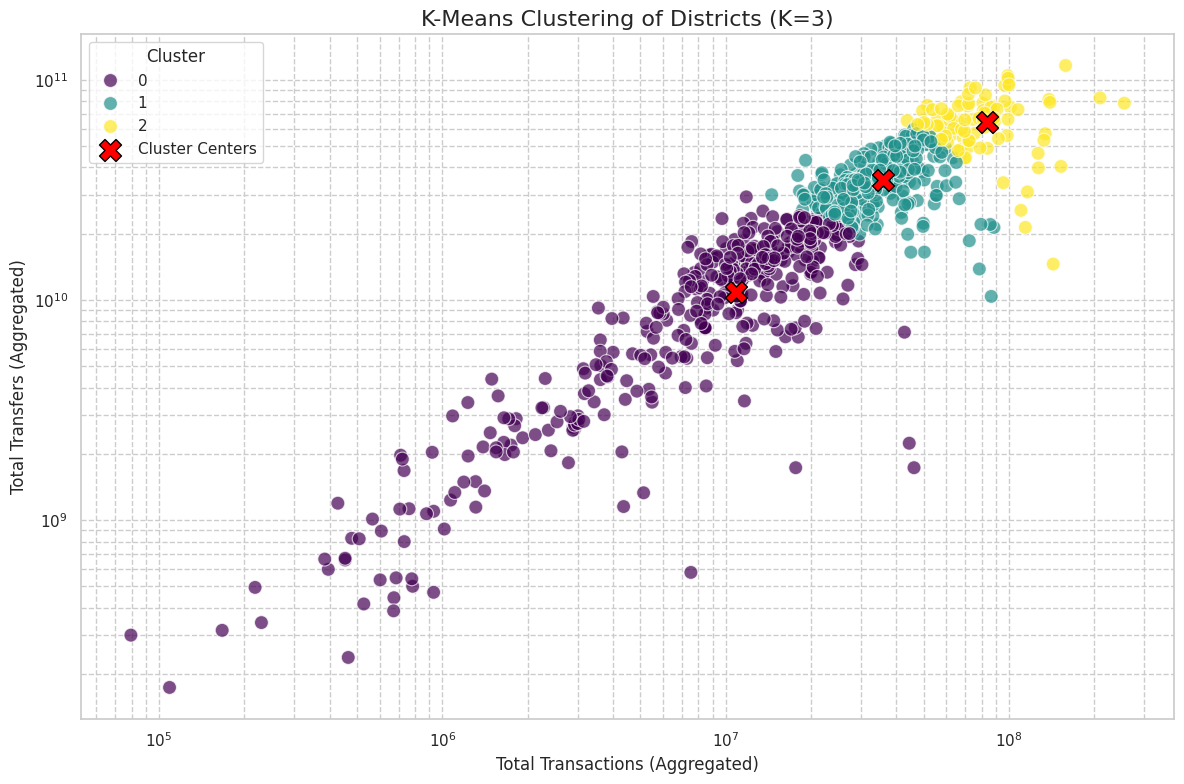


--- Cluster Analysis (Mean Values) ---
         total_transfer_sum  total_transactions_sum  count
cluster                                                   
0              1.083787e+10            1.081640e+07    393
1              3.498393e+10            3.581144e+07    278
2              6.463731e+10            8.330562e+07     94

--- Example Districts in each Cluster ---

--- Cluster 0 Examples ---
                    state_name             district_name  total_transfer_sum  \
0  Andaman And Nicobar Islands                  Nicobars        5.010295e+08   
1  Andaman And Nicobar Islands  North And Middle Andaman        9.119625e+08   
2  Andaman And Nicobar Islands            South Andamans        3.436453e+09   

   total_transactions_sum  
0                785526.0  
1               1015436.0  
2               5497182.0  

--- Cluster 1 Examples ---
        state_name district_name  total_transfer_sum  total_transactions_sum
26  Andhra Pradesh  Vizianagaram        4.429624e+10    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_name = 'dbt-district-wise-cleaned (1).csv'
try:
    df = pd.read_csv(file_name)
    print("--- Data Loaded Successfully ---")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure the file is uploaded to your Colab environment.")
    raise

# 1. Aggregate data by district
# We sum the total transfers and transactions over all years for each district
district_agg_df = df.groupby(['state_name', 'district_name']).agg(
    total_transfer_sum=('total_dbt_transfer', 'sum'),
    total_transactions_sum=('no_of_dbt_transactions', 'sum')
).reset_index()

# Filter out districts with zero transactions
district_agg_df = district_agg_df[district_agg_df['total_transactions_sum'] > 0]

# 2. Prepare and scale data for clustering
# We'll use the two numerical features
features_df = district_agg_df[['total_transfer_sum', 'total_transactions_sum']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# 3. Run K-Means with 3 clusters (as decided from the elbow plot)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
kmeans.fit(features_scaled)

# Add the cluster labels to our aggregated dataframe
district_agg_df['cluster'] = kmeans.labels_

print("\n--- K-Means Clustering Complete ---")

# 4. Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=district_agg_df,
    x='total_transactions_sum',
    y='total_transfer_sum',
    hue='cluster',
    palette='viridis', # A color-blind friendly palette
    s=100,
    alpha=0.7
)

# Convert scaled cluster centers back to original data scale for plotting
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

# Plot the cluster centers as red 'X's
plt.scatter(
    cluster_centers[:, 1], # Index 1 is 'total_transactions_sum'
    cluster_centers[:, 0], # Index 0 is 'total_transfer_sum'
    s=250,
    marker='X',
    c='red',
    edgecolor='black',
    label='Cluster Centers'
)

plt.title('K-Means Clustering of Districts (K=3)', fontsize=16)
plt.xlabel('Total Transactions (Aggregated)', fontsize=12)
plt.ylabel('Total Transfers (Aggregated)', fontsize=12)

# Use log scale to better visualize the clusters, as data is highly skewed
# The clusters are very far apart, so a log scale helps see them all
plt.xscale('log')
plt.yscale('log')

plt.legend(title='Cluster')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('kmeans_cluster_plot_k3.png')

print("Cluster plot saved as 'kmeans_cluster_plot_k3.png'")
plt.show() # Use plt.show() to display the plot in Colab

# 5. Analyze the clusters by looking at their mean values in the original scale
print("\n--- Cluster Analysis (Mean Values) ---")
# Calculate the mean of the original features for each cluster
cluster_summary = district_agg_df.groupby('cluster')[[
    'total_transfer_sum', 'total_transactions_sum'
]].mean()

# Add the count of districts in each cluster
cluster_summary['count'] = district_agg_df['cluster'].value_counts().sort_index()

print(cluster_summary)

print("\n--- Example Districts in each Cluster ---")
# Get a few examples from each cluster
for i in range(k):
    print(f"\n--- Cluster {i} Examples ---")
    print(district_agg_df[district_agg_df['cluster'] == i][[
        'state_name', 'district_name', 'total_transfer_sum', 'total_transactions_sum'
    ]].head(3))

Simple Linear Regression: Text for Report
To understand the relationship between the number of transactions and the total amount transferred, we applied a simple linear regression model.

For this analysis, we used the aggregated district-level data. The goal was to answer the question: "How well does a district's total number of transactions predict its total transfer amount?"

X (Independent Variable): total_transactions_sum

Y (Dependent Variable): total_transfer_sum

--- Data Loaded Successfully ---

--- Simple Linear Regression Results ---
R-squared (R²): 0.6357
Intercept (b₀): 9265327633.1254
Coefficient (b₁): 588.6761

Interpretation:
Y = 588.6761 * X + 9265327633.1254
This means for each additional transaction (X), the total transfer amount (Y) is predicted to increase by $588.6761.

Simple linear regression plot saved as 'simple_linear_regression.png'


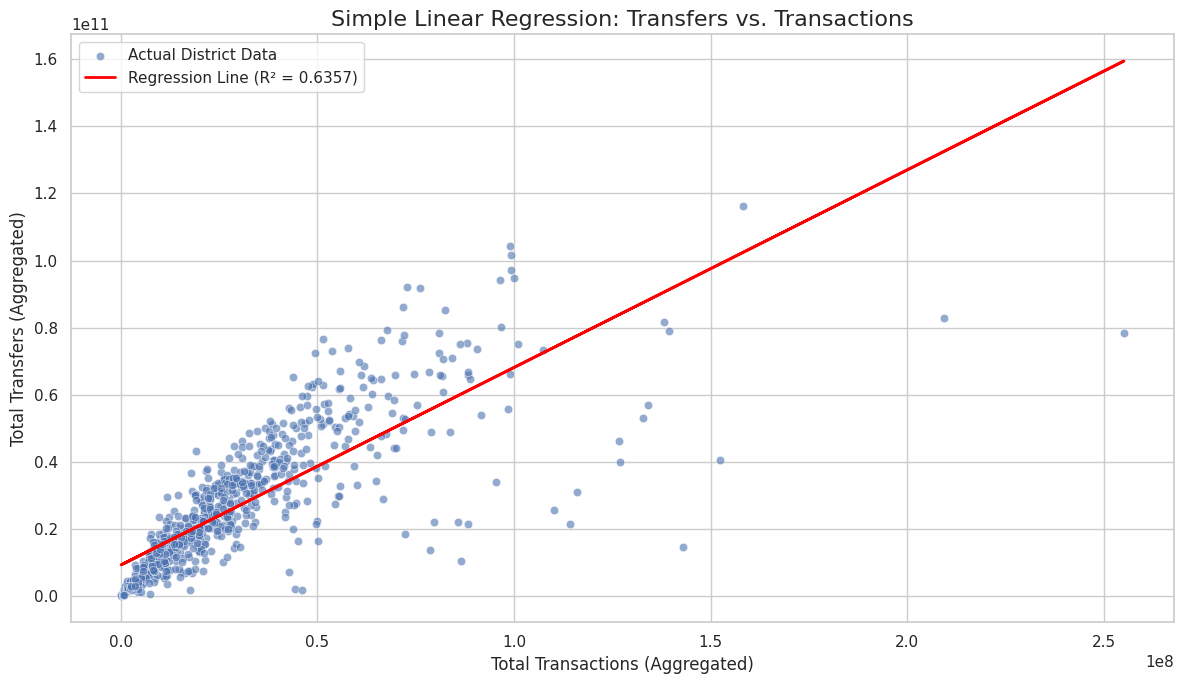

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_name = 'dbt-district-wise-cleaned (1).csv'
try:
    df = pd.read_csv(file_name)
    print("--- Data Loaded Successfully ---")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure the file is uploaded to your Colab environment.")
    raise

# 1. Aggregate data by district
# We sum the total transfers and transactions over all years for each district
district_agg_df = df.groupby(['state_name', 'district_name']).agg(
    total_transfer_sum=('total_dbt_transfer', 'sum'),
    total_transactions_sum=('no_of_dbt_transactions', 'sum')
).reset_index()

# Filter out districts with zero transactions
district_agg_df = district_agg_df[district_agg_df['total_transactions_sum'] > 0]

# 2. Define X and Y
# We want to predict total_transfer_sum (Y) using total_transactions_sum (X)
X_simple = district_agg_df[['total_transactions_sum']] # Needs to be a 2D array for sklearn
Y_simple = district_agg_df['total_transfer_sum']

# 3. Fit the model
simple_model = LinearRegression()
simple_model.fit(X_simple, Y_simple)

# 4. Get model metrics
r2_simple = simple_model.score(X_simple, Y_simple)
intercept_simple = simple_model.intercept_
coef_simple = simple_model.coef_[0]

print("\n--- Simple Linear Regression Results ---")
print(f"R-squared (R²): {r2_simple:.4f}")
print(f"Intercept (b₀): {intercept_simple:.4f}")
print(f"Coefficient (b₁): {coef_simple:.4f}")
print("\nInterpretation:")
print(f"Y = {coef_simple:.4f} * X + {intercept_simple:.4f}")
print(f"This means for each additional transaction (X), the total transfer amount (Y) is predicted to increase by ${coef_simple:.4f}.")

# 5. Plot the results
plt.figure(figsize=(12, 7))
# Scatter plot of the data
sns.scatterplot(
    data=district_agg_df,
    x='total_transactions_sum',
    y='total_transfer_sum',
    alpha=0.6,
    label='Actual District Data'
)

# Plot the regression line
# Generate predicted Y values using the model
Y_pred_simple = simple_model.predict(X_simple)
plt.plot(
    X_simple,
    Y_pred_simple,
    color='red',
    linewidth=2,
    label=f'Regression Line (R² = {r2_simple:.4f})'
)

plt.title('Simple Linear Regression: Transfers vs. Transactions', fontsize=16)
plt.xlabel('Total Transactions (Aggregated)', fontsize=12)
plt.ylabel('Total Transfers (Aggregated)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('simple_linear_regression.png')
print("\nSimple linear regression plot saved as 'simple_linear_regression.png'")
plt.show() # This will display the plot in your Colab notebook

Multiple Linear Regression:
To build a more predictive model, we used Multiple Linear Regression. This model uses more than one independent variable to predict the outcome.

For this analysis, we used the original, row-by-row dataset to predict the total_dbt_transfer based on two factors: the no_of_dbt_transactions and the fy (Financial Year).

Y (Dependent Variable): total_dbt_transfer

X (Independent Variables):

no_of_dbt_transactions

fy (treated as a categorical variable)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
file_name = 'dbt-district-wise-cleaned (1).csv'
try:
    df = pd.read_csv(file_name)
    print("--- Data Loaded Successfully ---")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure the file is uploaded to your Colab environment.")
    raise

# --- Part 2: Multiple Linear Regression ---
print("\n--- Running Multiple Linear Regression ---")

# 1. Prepare data
# We will use the *original* (non-aggregated) data
# We'll predict 'total_dbt_transfer' (Y)
# using 'no_of_dbt_transactions' and 'fy' (X)

# Create dummy variables for the 'fy' column
# drop_first=True avoids the "dummy variable trap" (multicollinearity)
fy_dummies = pd.get_dummies(df['fy'], prefix='fy', drop_first=True)

# 2. Define X and Y
# X_multiple includes the numerical feature and the new dummy features
X_multiple = pd.concat([df[['no_of_dbt_transactions']], fy_dummies], axis=1)
Y_multiple = df['total_dbt_transfer']

# 3. Split data into training and testing sets (good practice)
# We use a 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_multiple, Y_multiple, test_size=0.2, random_state=42
)

# 4. Fit the model on the training data
multiple_model = LinearRegression()
multiple_model.fit(X_train, Y_train)

# 5. Get model metrics on the *test set*
Y_pred_multiple = multiple_model.predict(X_test)
r2_multiple = r2_score(Y_test, Y_pred_multiple) # R-squared on unseen data
intercept_multiple = multiple_model.intercept_

print("\n--- Multiple Linear Regression Results (on Test Set) ---")
print(f"R-squared (R²): {r2_multiple:.4f}")
print(f"Intercept (b₀): {intercept_multiple:.4f}")

print("\nCoefficients (b₁, b₂, ...):")
# Create a series to easily see feature names and their coefficients
coefficients = pd.Series(multiple_model.coef_, index=X_multiple.columns)
print(coefficients)

print("\n--- Interpretation ---")
print(f"The R² value of {r2_multiple:.4f} indicates that {r2_multiple*100:.2f}% of the variance in total transfers can be explained by the number of transactions and the financial year.")

--- Data Loaded Successfully ---

--- Running Multiple Linear Regression ---

--- Multiple Linear Regression Results (on Test Set) ---
R-squared (R²): 0.7260
Intercept (b₀): -483873280.7609

Coefficients (b₁, b₂, ...):
no_of_dbt_transactions    4.683818e+02
fy_2020-2021              3.932172e+09
fy_2021-2022              4.410545e+09
fy_2022-2023              5.465745e+09
fy_2023-2024              1.280884e+09
dtype: float64

--- Interpretation ---
The R² value of 0.7260 indicates that 72.60% of the variance in total transfers can be explained by the number of transactions and the financial year.


Logistic Regression:
To build a classification model, we first engineered a binary target variable. We found the median value of the total_dbt_transfer column and created a new category called transfer_level. If a row's transfer amount was above the median, it was labeled "High" (1); if it was at or below the median, it was labeled "Low" (0).

The goal of the Logistic Regression model was to predict this "High" or "Low" category using no_of_dbt_transactions and the fy (financial year) as predictor variables.

--- Data Loaded Successfully ---
The median transfer amount is: 2474470098.0

Target variable 'transfer_level' created.

Features for the model: ['no_of_dbt_transactions', 'fy_2020-2021', 'fy_2021-2022', 'fy_2022-2023', 'fy_2023-2024']

Data split: 2677 training samples, 1148 testing samples.
Numerical features scaled successfully.

Logistic Regression model trained.

--- Model Accuracy ---
Accuracy on Test Set: 0.9059

--- Generating Confusion Matrix Heatmap ---
Confusion matrix heatmap saved as 'logistic_regression_confusion_matrix.png'


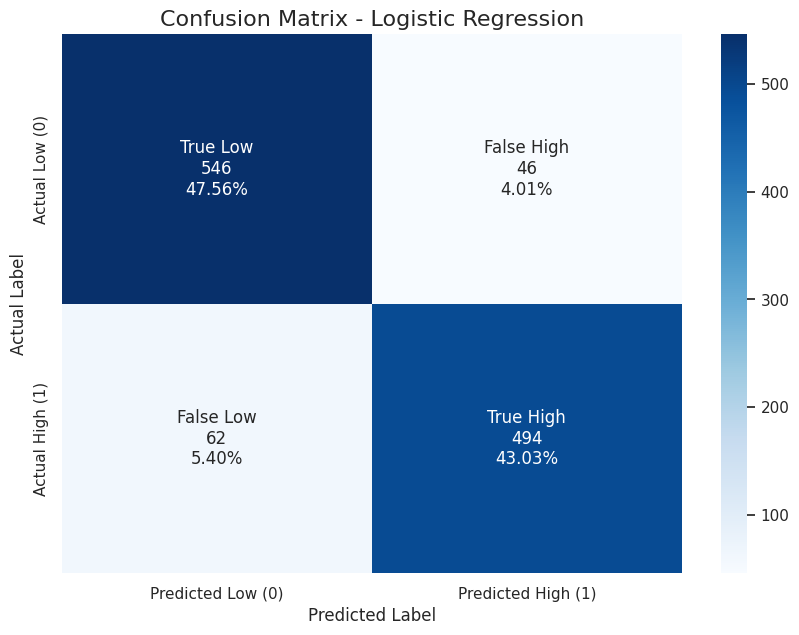

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_name = 'dbt-district-wise-cleaned (1).csv'
try:
    df = pd.read_csv(file_name)
    print("--- Data Loaded Successfully ---")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure the file is uploaded to your Colab environment.")
    raise

# --- 1. Feature Engineering: Create the Binary Target (Y) ---
# Find the median (the 50th percentile)
# THIS IS THE CORRECTED LINE:
median_transfer = df['total_dbt_transfer'].median()
print(f"The median transfer amount is: {median_transfer}")

# Create the binary target column 'transfer_level'
# 1 = High (above median), 0 = Low (at or below median)
df['transfer_level'] = (df['total_dbt_transfer'] > median_transfer).astype(int)

print("\nTarget variable 'transfer_level' created.")

# --- 2. Define Features (X) and Target (Y) ---
# Y is the new column we just created
Y = df['transfer_level']

# X includes our predictors: 'no_of_dbt_transactions' and 'fy'
# We must convert the categorical 'fy' column into dummy variables
fy_dummies = pd.get_dummies(df['fy'], prefix='fy', drop_first=True)
X = pd.concat([df[['no_of_dbt_transactions']], fy_dummies], axis=1)

print(f"\nFeatures for the model: {X.columns.to_list()}")

# --- 3. Split Data into Training and Testing Sets ---
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

print(f"\nData split: {len(X_train)} training samples, {len(X_test)} testing samples.")

# --- 4. Scale the Numerical Feature ---
scaler = StandardScaler()
X_train['no_of_dbt_transactions'] = scaler.fit_transform(X_train[['no_of_dbt_transactions']])
X_test['no_of_dbt_transactions'] = scaler.transform(X_test[['no_of_dbt_transactions']])
print("Numerical features scaled successfully.")

# --- 5. Train the Logistic Regression Model ---
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, Y_train)
print("\nLogistic Regression model trained.")

# --- 6. Evaluate the Model on the Test Set ---
Y_pred = log_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\n--- Model Accuracy ---")
print(f"Accuracy on Test Set: {accuracy:.4f}")

# --- 7. Generate and Plot Confusion Matrix ---
print("\n--- Generating Confusion Matrix Heatmap ---")

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Define the labels for the matrix cells
group_names = ['True Low', 'False High', 'False Low', 'True High']
group_counts = [f"{value}" for value in cm.flatten()]
group_percentages = [f"{value:.2%}" for value in cm.flatten() / np.sum(cm)]

# Combine the labels
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=labels,  # Add the combined labels
    fmt='',        # Format as string (already done in 'labels')
    cmap='Blues',  # Color scheme
    xticklabels=['Predicted Low (0)', 'Predicted High (1)'],
    yticklabels=['Actual Low (0)', 'Actual High (1)']
)

plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.savefig('logistic_regression_confusion_matrix.png')
print("Confusion matrix heatmap saved as 'logistic_regression_confusion_matrix.png'")
plt.show() # Display the plot in Colab

Decision Tree:
As a second classification model, we trained a Decision Tree. This model works differently than Logistic Regression, as it creates a set of "if-then" rules to make predictions.

--- Data Loaded Successfully ---
The median transfer amount is: 2474470098.0

Target variable 'transfer_level' created.

Features for the model: ['no_of_dbt_transactions', 'fy_2020-2021', 'fy_2021-2022', 'fy_2022-2023', 'fy_2023-2024']

Data split: 2677 training samples, 1148 testing samples.

Decision Tree model trained.

--- Model Accuracy ---
Accuracy on Test Set: 0.9024

--- Classification Report ---
              precision    recall  f1-score   support

     Low (0)       0.91      0.91      0.91       592
    High (1)       0.90      0.90      0.90       556

    accuracy                           0.90      1148
   macro avg       0.90      0.90      0.90      1148
weighted avg       0.90      0.90      0.90      1148


--- Generating Confusion Matrix Heatmap ---
Confusion matrix heatmap saved as 'decision_tree_confusion_matrix.png'


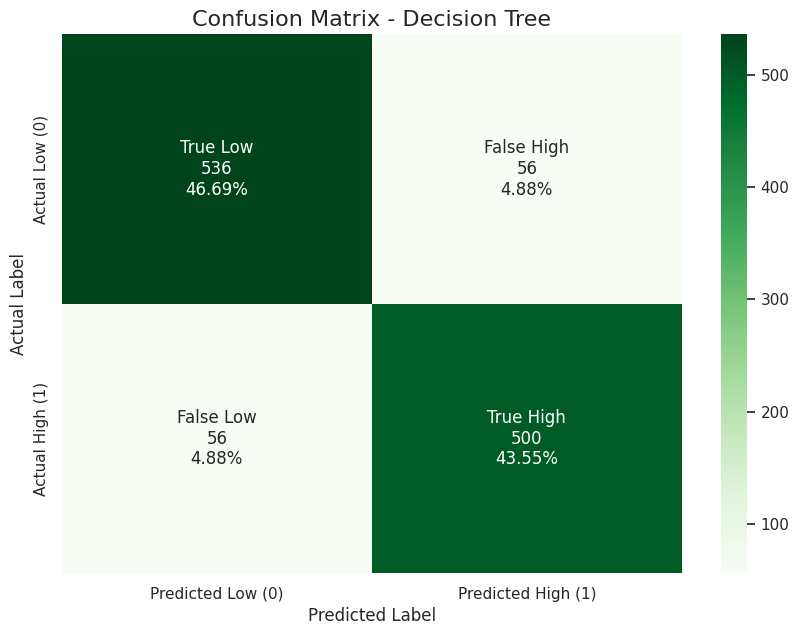


--- Feature Importances ---
                  Feature  Importance
0  no_of_dbt_transactions    0.820756
3            fy_2022-2023    0.061523
2            fy_2021-2022    0.053947
1            fy_2020-2021    0.041065
4            fy_2023-2024    0.022709

Insight: 'no_of_dbt_transactions' is the most important feature.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_name = 'dbt-district-wise-cleaned (1).csv'
try:
    df = pd.read_csv(file_name)
    print("--- Data Loaded Successfully ---")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure the file is uploaded to your Colab environment.")
    raise

# --- 1. Feature Engineering: Create the Binary Target (Y) ---
# Find the median (the 50th percentile)
median_transfer = df['total_dbt_transfer'].median()
print(f"The median transfer amount is: {median_transfer}")

# Create the binary target column 'transfer_level'
# 1 = High (above median), 0 = Low (at or below median)
df['transfer_level'] = (df['total_dbt_transfer'] > median_transfer).astype(int)

print("\nTarget variable 'transfer_level' created.")

# --- 2. Define Features (X) and Target (Y) ---
# Y is the new column we just created
Y = df['transfer_level']

# X includes our predictors: 'no_of_dbt_transactions' and 'fy'
# We must convert the categorical 'fy' column into dummy variables
fy_dummies = pd.get_dummies(df['fy'], prefix='fy', drop_first=True)
X = pd.concat([df[['no_of_dbt_transactions']], fy_dummies], axis=1)

print(f"\nFeatures for the model: {X.columns.to_list()}")

# --- 3. Split Data into Training and Testing Sets ---
# We use the same 70/30 split and 'stratify=Y' for a fair comparison
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

print(f"\nData split: {len(X_train)} training samples, {len(X_test)} testing samples.")

# --- 4. Train the Decision Tree Model ---
# Note: Decision Trees do NOT require feature scaling.
# We set a max_depth to prevent the tree from getting too complex (overfitting)
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, Y_train)
print("\nDecision Tree model trained.")

# --- 5. Evaluate the Model on the Test Set ---
Y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\n--- Model Accuracy ---")
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Print a detailed report
print(f"\n--- Classification Report ---")
report = classification_report(Y_test, Y_pred, target_names=['Low (0)', 'High (1)'])
print(report)

# --- 6. Generate and Plot Confusion Matrix ---
print("\n--- Generating Confusion Matrix Heatmap ---")

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Define the labels for the matrix cells
group_names = ['True Low', 'False High', 'False Low', 'True High']
group_counts = [f"{value}" for value in cm.flatten()]
group_percentages = [f"{value:.2%}" for value in cm.flatten() / np.sum(cm)]

# Combine the labels
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=labels,  # Add the combined labels
    fmt='',        # Format as string (already done in 'labels')
    cmap='Greens', # Use a different color map
    xticklabels=['Predicted Low (0)', 'Predicted High (1)'],
    yticklabels=['Actual Low (0)', 'Actual High (1)']
)

plt.title('Confusion Matrix - Decision Tree', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.savefig('decision_tree_confusion_matrix.png')
print("Confusion matrix heatmap saved as 'decision_tree_confusion_matrix.png'")
plt.show() # Display the plot in Colab

# --- 7. Show Feature Importances (A unique benefit of Trees) ---
print(f"\n--- Feature Importances ---")
importances = dt_model.feature_importances_
feature_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_imp_df)
print("\nInsight: 'no_of_dbt_transactions' is the most important feature.")

Neural Network Regressor:
Finally, we used a "numerical" neural network (MLPRegressor) to predict the exact total_dbt_transfer amount, rather than a category.

This model used the same inputs (no_of_dbt_transactions and fy) as our Multiple Linear Regression model, allowing for a direct comparison.

--- Data Loaded Successfully ---

Features for the model: ['no_of_dbt_transactions', 'fy_2020-2021', 'fy_2021-2022', 'fy_2022-2023', 'fy_2023-2024']
Target for the model: total_dbt_transfer

Data split: 3060 training samples, 765 testing samples.
Features and Target scaled successfully.

Training the Neural Network (MLPRegressor)...
Neural Network regressor trained.

--- Model Evaluation (on original scale) ---
R-squared (R²): 0.8513
Mean Squared Error (MSE): 5866761300762193920.0000
Root Mean Squared Error (RMSE): 2422139818.5824

--- Generating Predicted vs. Actual Plot ---
Predicted vs. Actual plot saved as 'neural_network_regressor_plot.png'


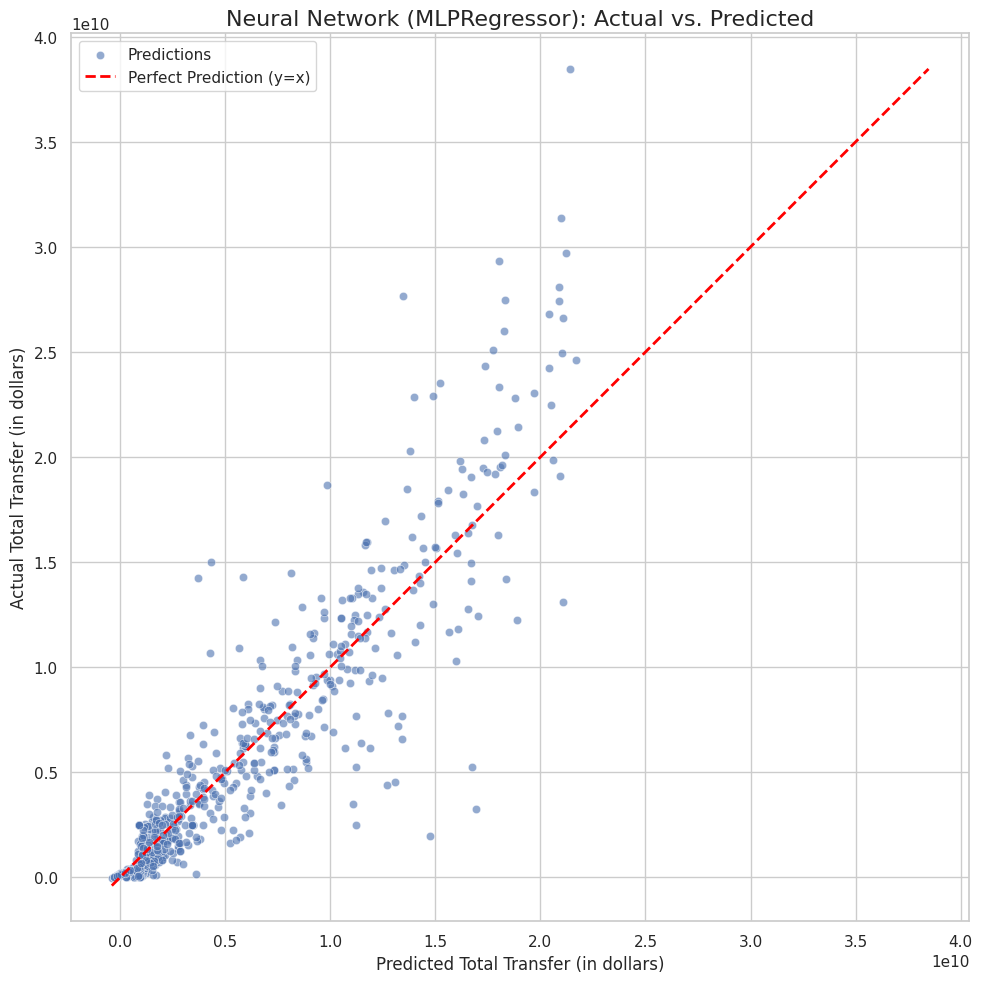

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
file_name = 'dbt-district-wise-cleaned (1).csv'
try:
    df = pd.read_csv(file_name)
    print("--- Data Loaded Successfully ---")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure the file is uploaded to your Colab environment.")
    raise

# --- 1. Define Features (X) and Target (Y) ---
# Y is the numerical target we want to predict
Y_numerical = df['total_dbt_transfer']

# X includes our predictors: 'no_of_dbt_transactions' and 'fy'
fy_dummies = pd.get_dummies(df['fy'], prefix='fy', drop_first=True)
X_numerical = pd.concat([df[['no_of_dbt_transactions']], fy_dummies], axis=1)

print(f"\nFeatures for the model: {X_numerical.columns.to_list()}")
print(f"Target for the model: {Y_numerical.name}")

# --- 2. Split Data into Training and Testing Sets ---
# We use an 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_numerical, Y_numerical, test_size=0.2, random_state=42
)

print(f"\nData split: {len(X_train)} training samples, {len(X_test)} testing samples.")

# --- 3. Scale Features and Target ---
# Neural Networks require all inputs AND outputs to be scaled.
# We reshape Y to be a 2D array for the scaler
Y_train_reshaped = Y_train.values.reshape(-1, 1)
Y_test_reshaped = Y_test.values.reshape(-1, 1)

# Initialize scalers
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Fit scalers ONLY on training data
X_train_scaled = x_scaler.fit_transform(X_train)
Y_train_scaled = y_scaler.fit_transform(Y_train_reshaped)

# Apply the same scalers to the test data
X_test_scaled = x_scaler.transform(X_test)
# We leave Y_test in its original form for the final evaluation

print("Features and Target scaled successfully.")

# --- 4. Train the Neural Network (MLPRegressor) ---
print("\nTraining the Neural Network (MLPRegressor)...")
mlp_reg_model = MLPRegressor(
    hidden_layer_sizes=(100,),
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)
# .ravel() is used to make the Y_train_scaled array 1-dimensional, as required by the fit method
mlp_reg_model.fit(X_train_scaled, Y_train_scaled.ravel())
print("Neural Network regressor trained.")

# --- 5. Evaluate the Model on the Test Set ---
# Get predictions (these will be on the scaled value)
Y_pred_scaled = mlp_reg_model.predict(X_test_scaled)

# **Crucial Step:** Inverse-transform the predictions to their original scale (dollars)
# We must reshape the 1D prediction array to 2D for the scaler's inverse_transform
Y_pred_original = y_scaler.inverse_transform(Y_pred_scaled.reshape(-1, 1)).flatten()

# Now we can compare the original-scale predictions (Y_pred_original)
# with the original-scale test values (Y_test)
r2 = r2_score(Y_test, Y_pred_original)
mse = mean_squared_error(Y_test, Y_pred_original)

print(f"\n--- Model Evaluation (on original scale) ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")

# --- 6. Generate and Plot Predicted vs. Actual ---
print("\n--- Generating Predicted vs. Actual Plot ---")

# Create a dataframe for easy plotting
results_df = pd.DataFrame({
    'Actual Transfers': Y_test,
    'Predicted Transfers': Y_pred_original
})

plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=results_df,
    x='Predicted Transfers',
    y='Actual Transfers',
    alpha=0.6,
    label='Predictions'
)

# Add a 45-degree line (y=x) for reference.
min_val = min(results_df['Actual Transfers'].min(), results_df['Predicted Transfers'].min())
max_val = max(results_df['Actual Transfers'].max(), results_df['Predicted Transfers'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction (y=x)')

plt.title('Neural Network (MLPRegressor): Actual vs. Predicted', fontsize=16)
plt.xlabel('Predicted Total Transfer (in dollars)', fontsize=12)
plt.ylabel('Actual Total Transfer (in dollars)', fontsize=12)
plt.legend()
plt.grid(True)
# Ensure the plot is square and axes match
plt.axis('equal')
plt.tight_layout()
plt.savefig('neural_network_regressor_plot.png')
print("Predicted vs. Actual plot saved as 'neural_network_regressor_plot.png'")
plt.show() # Display the plot in Colab